# Kalorimetrie Küchentischversuch - Wärmekapazität eines Behälters

Author: Andy Zheng

Datum: 9.11.23

Gruppe: 03

## Forschungsfrage

Formulieren Sie eine oder mehrere Forschungsfragen zu diesem Versuch.

Was ist die Wärmekapazität von Wasser?

## Versuchsaufbau und Durchführung

Beschreiben Sie den Versuchsaufbau und die Versuchsdurchführung. Machen Sie ein Bild von Ihrem Aufbau und nutzen Sie dieses mit zur Beschreibung.


250ml kaltes Wasser in einer Schüssel und 250ml warmes Wasser in einer Tasse.
Warmes Wasser wird in die Schüssel geschüttet.

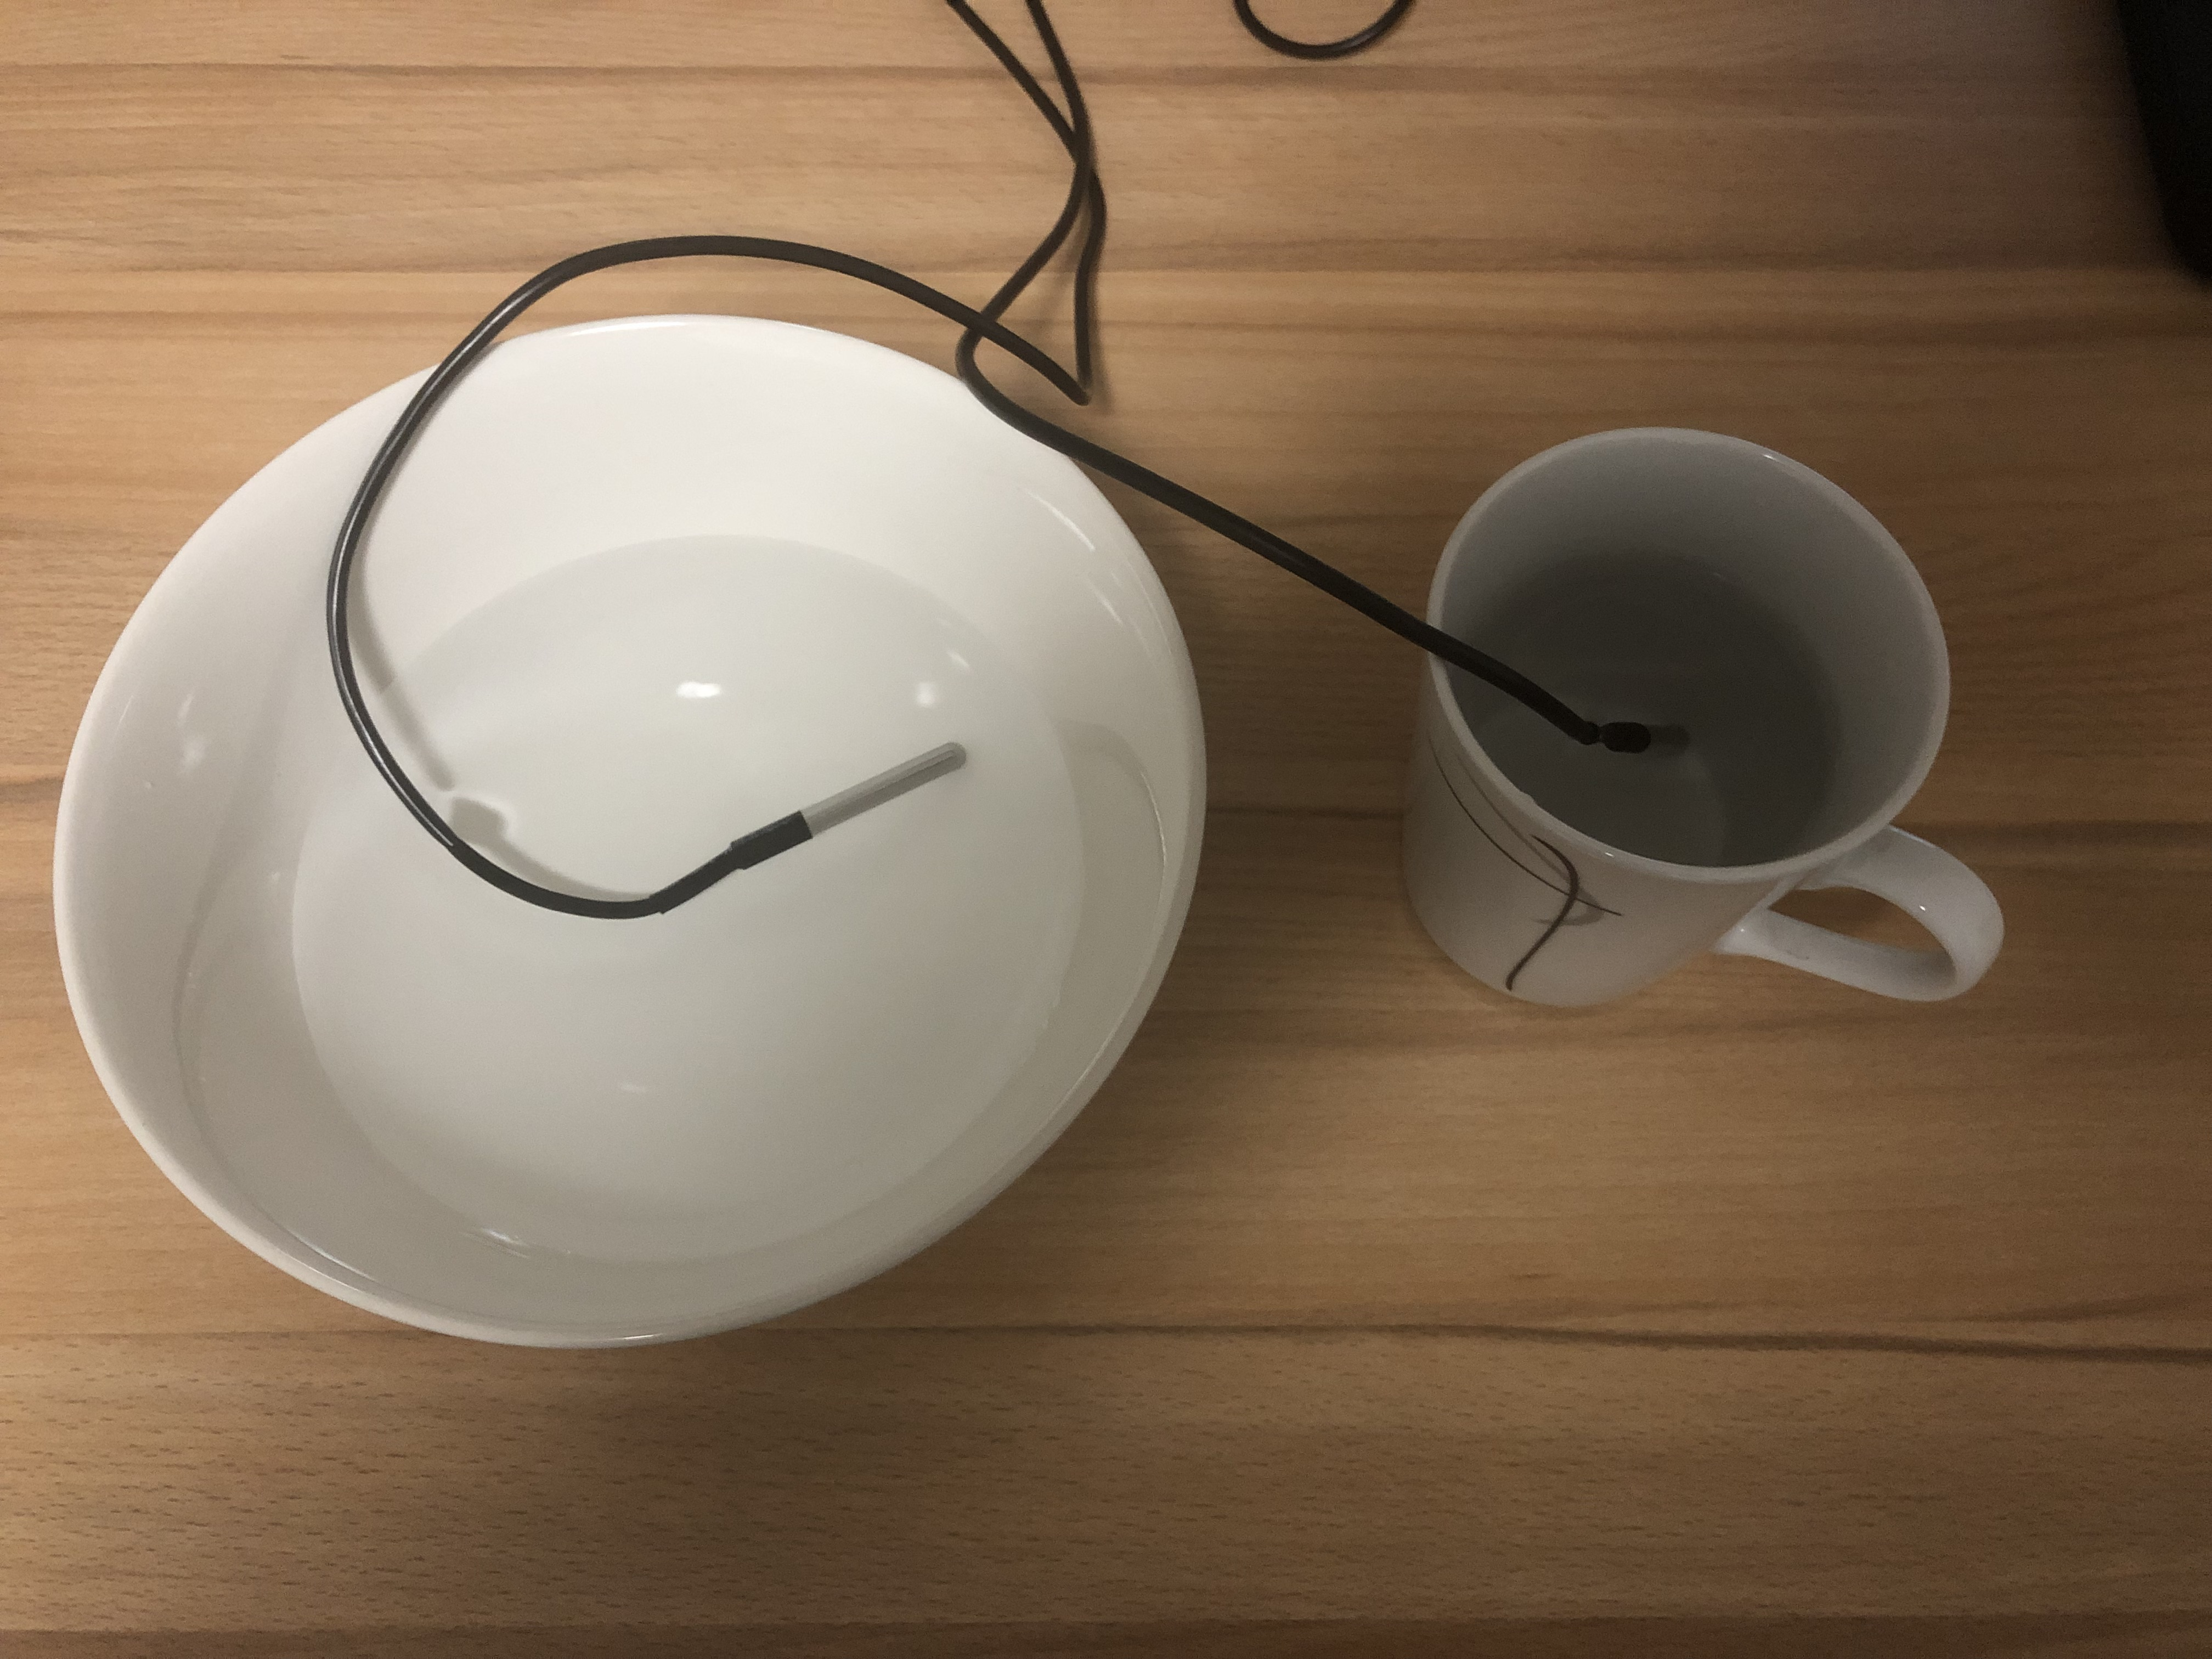

## Versuchsauswertung

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
# If you plan to write functions in another module,
# you can use importlib.reload(module) to reload the module
# at the beginning of each cell in order to make the latest
# changes take effect without restart the kernel.
import importlib

from functions import m_json

# Use FST-Style, if you don't like it, you can safely delete this line.
plt.style.use("FST.mplstyle")


### Wärmekapazität eines Behälters

Hinweis: Nutzen Sie die Funktionen *get_ids_from_setup* und *get_json_entry* um auf Metadaten zuzugreifen. 

Sie sollten Ihr Programm zwischen TODO und DONE implementieren, und versuchen die Anweisung zu verfolgen. Das ist aber nicht erforderlich.


#### (i) Messdaten einlesen und (ii) Daten plotten

Messdaten werden in das Notebook eingelesen.

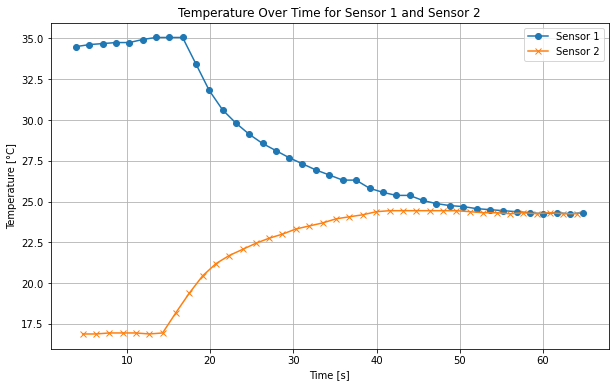

In [14]:
import h5py
import matplotlib.pyplot as plt
import numpy as np

file_path = "calorimetry_home.h5"
hdf5_file = h5py.File(file_path, "r")

# Access the datasets for sensor_1 and sensor_2
sensor_1_temperature = hdf5_file["RawData/sensor_1/temperature"]
sensor_2_temperature = hdf5_file["RawData/sensor_2/temperature"]

# Access the timestamp datasets for sensor_1 and sensor_2
sensor_1_timestamps = hdf5_file["RawData/sensor_1/timestamp"]
sensor_2_timestamps = hdf5_file["RawData/sensor_2/timestamp"]

# Convert the timestamp datasets to NumPy arrays
sensor_1_timestamps_array = np.array(sensor_1_timestamps)
sensor_2_timestamps_array = np.array(sensor_2_timestamps)

# Convert the temperature datasets to NumPy arrays
sensor_1_temperature_array = np.array(sensor_1_temperature)
sensor_2_temperature_array = np.array(sensor_2_temperature)

# Create a single figure to plot both temperatures
plt.figure(figsize=(10, 6))

# Plot the temperature data for sensor_1
plt.plot(sensor_1_timestamps_array, sensor_1_temperature_array, label="Sensor 1", linestyle='-', marker='o')

# Plot the temperature data for sensor_2
plt.plot(sensor_2_timestamps_array, sensor_2_temperature_array, label="Sensor 2", linestyle='-', marker='x')

plt.xlabel("Time [s]")
plt.ylabel("Temperature [°C]")
plt.title("Temperature Over Time for Sensor 1 and Sensor 2")
plt.legend()
plt.grid(True)
plt.show()

# Close the HDF5 file
hdf5_file.close()

#### (iii) Metadaten auslesen

Die notwendigen Metadaten für die Berechnung der Wärmekapazität wird ausgelesen.

In [17]:
# Heat capacity of Water
c_w = 4.18
m_add = 0.25
m_cup = 0.25

#### (iV) Anfangs- und Endwert der Temperatur

In [18]:
import h5py
import numpy as np

file_path = "calorimetry_home.h5"
hdf5_file = h5py.File(file_path, "r")

# Access the datasets for sensor_1 and sensor_2
sensor_1_temperature = hdf5_file["RawData/sensor_1/temperature"]
sensor_2_temperature = hdf5_file["RawData/sensor_2/temperature"]

# Convert the temperature datasets to NumPy arrays
sensor_1_temperature_array = np.array(sensor_1_temperature)
sensor_2_temperature_array = np.array(sensor_2_temperature)

# Find the first and last temperatures for sensor_1
first_temperature_sensor_1 = sensor_1_temperature_array[0]
last_temperature_sensor_1 = sensor_1_temperature_array[-1]

# Find the first and last temperatures for sensor_2
first_temperature_sensor_2 = sensor_2_temperature_array[0]
last_temperature_sensor_2 = sensor_2_temperature_array[-1]

# Close the HDF5 file
hdf5_file.close()

T_1 = first_temperature_sensor_2
T_2 = first_temperature_sensor_1
T_M = last_temperature_sensor_1

# Print the results
print("T_1:", T_1)
print("T_2:", T_2)
print("T_M:", T_M)

T_1: 16.875
T_2: 34.5
T_M: 24.3125


#### (V) Wärmekapazität bestimmen
$$
C = \frac{m_{add}c_{w}(T_2-T_M)}{T_M - T_1} - m_{cup}c_{w}
$$
Dabei ist $m_{add}$ die Masse vom hinzugefügten Wasser, $T_2$ ist seine Temperatur. Die Masse vom Wasser im Behälter ist $m_{cup}$ und seine Temperatur ist $T_1$. Die Mischungstemperatur ist $T_M$. Die spezifische Wärmekapazität von Wasser ist $c_w$.

In [19]:
C = ((m_add * c_w * (T_2 - T_M))/(T_M-T_1)) - m_cup * c_w

#### (Vi) Ergebnis

In [24]:
print("C =", C, "kJ/K")

C = 0.38638655462184857 kJ/K


## Diskussion

Analysieren Sie Ihre Ergebnisse aus wissenschaflticher Sicht. Berücksichtigen Sie dabei Ihre oben genannte Forschungsfrage.

Die Wärmekapazität meiner Probe liegt bei 0,39 kJ/K. Jedoch muss das nicht unbedingt richtig sein, denn mein Experiment könnte fehlerhaft gewesen sein:

1. Messfehler: Messungen von Temperaturänderungen können Fehler enthalten, die die Ergebnisse beeinflussen. Es ist wichtig sicherzustellen, dass die Messgeräte korrekt kalibriert sind und dass die Experimentbedingungen sorgfältig kontrolliert werden.

2. Verunreinigungen: Wenn das Wasser verunreinigt ist, kann dies die gemessene Wärmekapazität beeinflussen. Fremdstoffe im Wasser könnten eine geringere Wärmekapazität haben oder die Wärmeübertragung im Experiment behindern.

3. Temperaturänderungen während des Experiments: Wenn die Temperatur des Wassers nicht konstant gehalten wird und sich während des Experiments ändert, kann dies die Messungen beeinflussen. Die spezifische Wärmekapazität von Wasser ist temperaturabhängig.

4. Experimentelle Bedingungen: Die Durchführung des Experiments unter nicht idealen Bedingungen, wie ungenauer Kontrolle der Wärmeübertragung oder unzureichender Isolierung, kann zu falschen Ergebnissen führen.

5. Probenqualität: Die Qualität des Wassers selbst, insbesondere in Bezug auf seine Reinheit und Zusammensetzung, kann die gemessene spezifische Wärmekapazität beeinflussen.

## Fazit
Ziehe Sie ein persönliches Fazit zum Versuch.

Es ist wichtig, dass Experimente und Messungen sorgfältig überprüft werden, um sicherzustellen, dass alle relevanten Einflussfaktoren berücksichtigt werden. In vielen Fällen können Abweichungen von theoretischen Werten auf experimentelle Fehler oder unberücksichtigte Variablen zurückgeführt werden.